In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [6]:
# Load historical price data (replace 'your_data.csv' with your actual file)
df = pd.read_csv('/content/onion_prices.csv')  # Example CSV: columns = ['Date', 'Price']
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [7]:
# Sort by date (important for time-series)
df.sort_index(inplace=True)

In [8]:
# Normalize prices for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(df[['Price']])


In [9]:
# Create sequences for LSTM input
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(x), np.array(y)


In [10]:
SEQ_LEN = 30  # Use past 30 days to predict the next day
X, y = create_sequences(scaled_prices, SEQ_LEN)


In [11]:
# Split into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [12]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(SEQ_LEN, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - loss: 0.2129 - val_loss: 0.3143
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1309 - val_loss: 0.1146
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0357 - val_loss: 0.0036
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0086 - val_loss: 0.0407
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0219 - val_loss: 0.0054
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0051 - val_loss: 0.0113
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0068 - val_loss: 0.0217
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0084 - val_loss: 0.0187
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0070 - val_loss: 0.0087
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0048 - val_loss: 0.0039
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0049 - val_loss: 0.0036
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0053 - val_loss: 0.0037


In [14]:
# Predict on test data
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


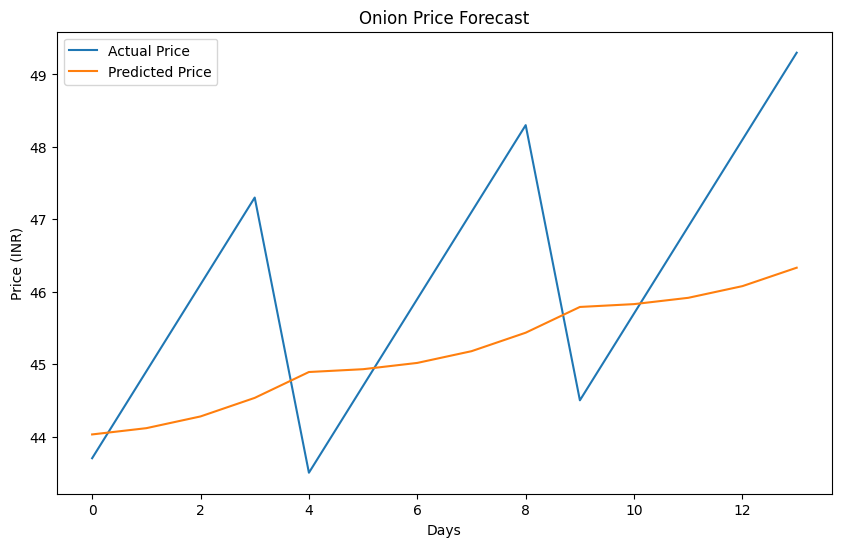

In [15]:
# Plot predictions vs actual
plt.figure(figsize=(10,6))
plt.plot(real_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title('Onion Price Forecast')
plt.xlabel('Days')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()